# Uvod u Pymote

Cilj ove vježbe je napraviti pregled najbitnijih komponenti paketa Pymote namjenjenog simulaciji raspodijeljenih algoritama.

Za to se koristi interaktivna konzola IPython *obavezno* pokrenuta s profilom `pymote` na slijedeći način `ipython --profile=pymote` ili pokretanjem programa `ipymote` kojim se čini ista stvar. Na taj način, između ostalog, napravljen je import najvažnijih klasa i funkcija paketa Pymote te je podešen *backend* Qt za `matplotlib` paket i grafičko sučelje.

Alternativno moguće je koristiti i ovaj notebook pokretanjem jupyter-a sa `ipython notebook --profile=pymote`.

**Napomena:** promjene u instalaciji simulatora

    pip install matplotlib==2.2.3
    pip install notebook

## Ispitivanje terena

Na početku možemo ispitati što se nudi u paketu i kako to odgovara teoriji obrađenoj u predavanju "Raspodijeljena računalna okruženja".

**Napomena:** programski kod u ovom dijelu vježbe primarno služi kao ilustracija osnovnih klasa koje sačinjavaju raspodijeljeno računalno okruženje te njihovih metoda i atributa i nije niti predviđeni niti preporučeni način korištenja simulatora.

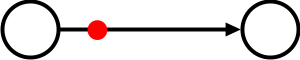

In [1]:
from IPython.display import Image
Image('images/entiteti_poruka.png')

Osnovni elementi računalnog okruženja su **entiteti** i **poruke**, a dodatna struktura koja je uvedena kroz simulator i u kojoj su grupirani entiteti je **mreža**.

In [7]:
import sys
sys.path

['C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\src\\pymote39\\pymote\\scripts',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\python39.zip',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\DLLs',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64',
 '',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\win32',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-pack

In [6]:
#sys.path.append('C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\src\\pymote39')
sys.path.append('C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\Lib\\site-packages')

In [25]:
print(sys.version)


3.9.10 (tags/v3.9.10:f2f3f53, Jan 17 2022, 15:14:21) [MSC v.1929 64 bit (AMD64)]


### Entiteti

Entiteti se u simulatoru nazivaju **čvorovi** i predstavljeni su instancama klase `Node`.

In [9]:
# wildcard import se inače ne preporuča koristiti no kako je cilj upoznati sve komponente paketa u ovom kontekstu je to u redu
from pymote import *

node = Node()

WARNING [__init__.py]: Environment variable PYMOTE_SETTINGS_MODULE is undefined, using global_settings.


Memorija $M_x$ čvora $x$ je implementirana kroz atribut `memory`, a koji je običan python `dict` te omogućava osnovnu predviđenu funkcionalnost: spremanje proizvoljnih informacija odnosno podataka u pojedine registre odnosno ključeve.

In [12]:
node.memory

{}

Jedan od posebnih registara je u simulatoru izdvojen iz memorije, a to je statusni registar $\text{status}(x) \in \mathcal{S}$ i to je prema tipu podataka običan `string`.

In [13]:
node.status = ""

Čvoru je prilikom instanciranja dodjeljen jedinstveni identifikacijski broj ili `id`:

In [14]:
node.id

1

Čvor ima posebne atribute `inbox` i `outbox` koji se koriste za primitak i slanje poruka, trenutno su prazni.

In [17]:
print(node.inbox)
print(node.outbox)

[]
[]


U pythonu, instance i njihovi atributi i metode se mogu dohvatiti funkcijom `dir` (introspekcija). Više informacija se može pronaći u dokumentaciji paketa, a ponekad i sam izvorni kôd jasno otkriva svrhu pojedine metode. 

In [18]:
node.reset??

Čvor trenutno nije dio nijedne mreže. Indikacija toga je što atribut `network` nije postavljen:

In [19]:
node.network is None

True

### Mreža

Stvorimo praznu mrežu te možemo dodati ranije stvoreni čvor u nju.

In [28]:
net = Network()

TypeError: object.__new__() takes exactly one argument (the type to instantiate)

In [21]:
net.add_node(node)

<Node id=6>

Sada čvor ima postavljen atribut `network`:

In [22]:
node.network

Veza je dvosmjerna, odnosno i mreža 'zna' koji čvorovi su dio mreže:

In [23]:
net.nodes()

[<Node id=6>]

Ako ne specificiramo čvor koji se dodaje, metoda sama stvara novi.

In [25]:
net.add_node()

<Node id=8>

In [26]:
net.nodes()

[<Node id=6>, <Node id=7>, <Node id=8>]

U metodi `add_node` može se specificirati i pozicija čvora no ako ona nije specificirana dodijeljuju se nasumično odabrane pozicije (lokacija i orijentacija). Trenutno dodjeljene lokacije mogu se pronaći u atributu `pos`, a orijentacije u atributu `ori`:

In [27]:
net.pos

{<Node id=7>: array([ 396.94052583,   20.20536874]),
 <Node id=6>: array([ 589.43540493,   80.08976908]),
 <Node id=8>: array([ 180.14779495,    8.73124138])}

In [28]:
net.ori

{<Node id=7>: 4.343954274366324,
 <Node id=6>: 5.85148832107995,
 <Node id=8>: 6.179268226333254}

Pozicije se biraju unutar *default*nog okruženja mreže odnosno 2D prostora veličine 600x600 koji je specificiran atributom `environment`.

In [29]:
net.environment

U slučaju 2D environmenta to je numpy 2d polje U kojem je sa 255 predstavljen prazan prostor, a sa vrijednostima manjim od 255 prepreke.

In [30]:
net.environment.im

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [31]:
net.environment.im.shape

(600L, 600L)

In [32]:
# podrska za iscrtavanje izravno u notebooku
%matplotlib inline

C:\Users\Krepana Krava\Documents\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


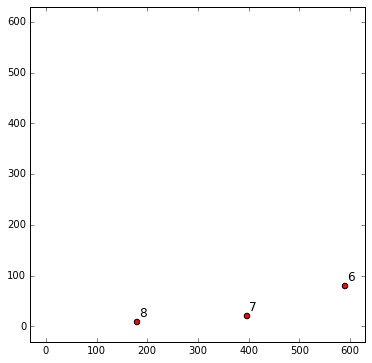

In [33]:
net.show()

Ukoliko čvorovi nisu povezani to je zbog ograničenog komunikacijskog dometa svakog od njih.

In [34]:
node.commRange

100

In [35]:
for node in net.nodes():
    node.commRange = 600
net.recalculate_edges()

Sa povećanim dometom trebali bi dobiti brid u grafu odnosno mogućnost komunikacije.

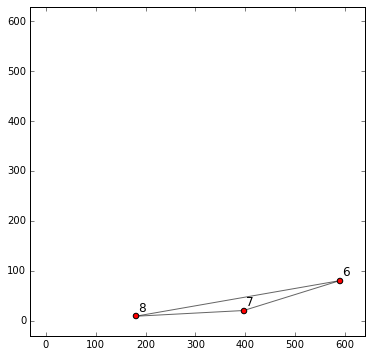

In [36]:
net.show()

### Poruke

Poruke u raspodijeljenom računalnom okruženju su po definiciji nizovi bitova koji su u simulatoru predstavljeni kao intance klase `Message`.

In [37]:
from pymote.message import Message
message = Message()

In [38]:
message


------ Message ------ 
     source = None 
destination = Broadcasted 
     header = '' 
id(message) = 0x3fbae5f8>

Za slanje poruke koristi se metoda `send`:

In [39]:
node.send(message)

Metoda `send` je poruku prebacila u outbox listu čvora.

In [40]:
node.outbox

[
 ------ Message ------ 
      source = <Node id=8> 
 destination = Broadcasted 
      header = '' 
 id(message) = 0x279cfd0>]

Primijetite kako su podaci zapisani u poruku samim izvršenjem metode `send` osvježeni. Preciznije u ovom slučaju polje `source` je poprimilo odgovarajuću vrijednost.

In [41]:
net.communicate()

Sam čin komunikacije odnosno prebacivanja svih poruka iz polaznih u odredišne čvorove (susjede) je pod kontrolom mreže i obavlja se njenom metodom `communicate`. Ovaj dio se obično odvija automatizmom u svakom koraku simulacije, no o tome više u daljnjem tekstu.

Mreža, u ovisnosti o ograničenjima, može poruku ili zadržati određeni broj koraka ili isporučiti odmah u slijedećem koraku što je i *default* ponašanje.

Poruka više nije u `outbox`-u polazišnog čvora:

In [42]:
node.outbox

[]

Nalazi se u `inbox`-u odredišnog čvora ili čvorova:

In [52]:
other_node = net.nodes()[0]

In [53]:
other_node.inbox

[
 ------ Message ------ 
      source = <Node id=8> 
 destination = <Node id=6> 
      header = '' 
 id(message) = 0x3fbae588>]

## 'Hello distributed world'

U ovom primjeru analiziramo implementaciju jednog od najjednostavnijih algoritama pod imenom `Flood`, a koji riješava problem *Broadcast*. Cilj algoritma je podijeliti informaciju koju posjeduje jedan čvor ostalim čvorovima u mreži.

### Kreiranje mreže

Mreža kao osnovna struktura može se kreirati na više načina. U većini slučajeva sasvim dovoljno je koristiti klasu `NetworkGenerator` kojoj se prilikom instanciranja pridruže željeni parametri kao što su broj čvorova (točan, maksimalan, minimalan) prosječan broj susjeda itd... 

U ovom primjeru jedini parametar koji se želi imati pod kontrolom je broj čvorova, a iznosi 100:

In [55]:
net_gen = NetworkGenerator(100)

Za detaljan opis opcija pogledati pymote dokumentaciju za klasu [NetworkGenerator](https://pymote.readthedocs.org/en/latest/reference/networkgenerator.html).

Nakon toga možemo koristiti metode generatora kako bi izradili nove mreže s željenim parametrima, primjerice za nasumičan raspored čvorova koristi se metoda `generate_random_network()`:

In [56]:
net = net_gen.generate_random_network()

Metoda kao rezultat vraća željenu mrežu odnosno instancu klase `Network`:

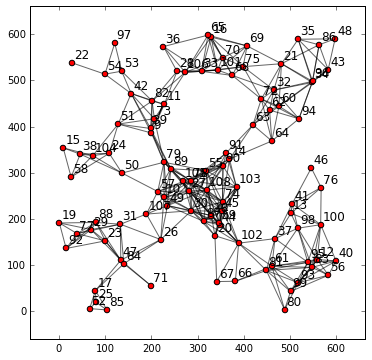

In [57]:
net.show()

### Algoritam

Algoritam `Flood` dio je modula `broadcast` te ukoliko ga želimo koristiti moramo ga uvesti:

In [58]:
from pymote.algorithms.broadcast import Flood

i pridružiti mreži:

In [60]:
net.algorithms = ( (Flood, {'informationKey': 'I'}), )

Kod pridruživanja algoritama mreži potrebno je primjetiti nekoliko stvari:

* pojedini algoritam je torka odn. `tuple` od dva elementa u kojem je prvi klasa algoritma, u ovom slučaju `Flood`, a drugi je `dict` koji se sastoji od parametara
    * npr. `Flood` prima kao obavezni parametar ključ pod kojim će čvorovi u svojoj memoriji spremati informaciju koja se želi podijeliti
* algoritmi se pridružuju kao elementi torke, a kako u ovom primjeru se pridružuje samo jedan algoritam potrebno je iza njega dodati zarez kako bi Python stvorio torku od jednog elementa
    * primjerice `(1)` je `int`, ali `(1, )` je `tuple`

Algoritam zahtijeva postojanje barem jednog čvora koji ima informaciju, odn. inicijatora. Kako bi to bilo osigurano jednom od čvorova se ta informacija treba upisati u memoriju prije pokretanja samog algoritma:

In [61]:
some_node = net.nodes()[0]                         # uzimamo prvi čvor u listi čvorova mreže
some_node.memory['I'] = 'Hello distributed world'  # pod ključem 'I' upisujemo informaciju

### Simulacija

Nakon definicije mreže i pridruživanja algoritma potrebno je pokrenuti simulaciju. Simulaciji se pri instanciranju kao argument šalje mreža nad kojom se želi obaviti simulacija:

In [62]:
sim = Simulation(net)

DEBUG   [simulation.py]: Simulation 0x3f9e7708L created successfully.


DEBUG:pymote.simulation:Simulation 0x3f9e7708L created successfully.


Ostaje još samo i pokrenuti simulaciju:

In [63]:
sim.run()

DEBUG   [simulation.py]: [Flood] Step 1 finished


DEBUG:pymote.simulation:[Flood] Step 1 finished


DEBUG   [simulation.py]: [Flood] Step 2 finished


DEBUG:pymote.simulation:[Flood] Step 2 finished


DEBUG   [simulation.py]: [Flood] Step 3 finished


DEBUG:pymote.simulation:[Flood] Step 3 finished


DEBUG   [simulation.py]: [Flood] Step 4 finished


DEBUG:pymote.simulation:[Flood] Step 4 finished


DEBUG   [simulation.py]: [Flood] Step 5 finished


DEBUG:pymote.simulation:[Flood] Step 5 finished


DEBUG   [simulation.py]: [Flood] Step 6 finished


DEBUG:pymote.simulation:[Flood] Step 6 finished


DEBUG   [simulation.py]: [Flood] Step 7 finished


DEBUG:pymote.simulation:[Flood] Step 7 finished


DEBUG   [simulation.py]: [Flood] Step 8 finished


DEBUG:pymote.simulation:[Flood] Step 8 finished


DEBUG   [simulation.py]: [Flood] Step 9 finished


DEBUG:pymote.simulation:[Flood] Step 9 finished


DEBUG   [simulation.py]: [Flood] Step 10 finished


DEBUG:pymote.simulation:[Flood] Step 10 finished


DEBUG   [simulation.py]: [Flood] Step 11 finished


DEBUG:pymote.simulation:[Flood] Step 11 finished


DEBUG   [simulation.py]: [Flood] Step 12 finished


DEBUG:pymote.simulation:[Flood] Step 12 finished


DEBUG   [simulation.py]: [Flood] Step 13 finished


DEBUG:pymote.simulation:[Flood] Step 13 finished


DEBUG   [simulation.py]: [Flood] Step 14 finished


DEBUG:pymote.simulation:[Flood] Step 14 finished


DEBUG   [simulation.py]: [Flood] Step 15 finished


DEBUG:pymote.simulation:[Flood] Step 15 finished


DEBUG   [simulation.py]: [Flood] Step 16 finished


DEBUG:pymote.simulation:[Flood] Step 16 finished


DEBUG   [simulation.py]: [Flood] Step 17 finished


DEBUG:pymote.simulation:[Flood] Step 17 finished


DEBUG   [simulation.py]: [Flood] Step 18 finished


DEBUG:pymote.simulation:[Flood] Step 18 finished


DEBUG   [simulation.py]: [Flood] Step 19 finished


DEBUG:pymote.simulation:[Flood] Step 19 finished


DEBUG   [simulation.py]: [Flood] Step 20 finished


DEBUG:pymote.simulation:[Flood] Step 20 finished


DEBUG   [simulation.py]: [Flood] Step 21 finished


DEBUG:pymote.simulation:[Flood] Step 21 finished


DEBUG   [simulation.py]: [Flood] Step 22 finished


DEBUG:pymote.simulation:[Flood] Step 22 finished


DEBUG   [simulation.py]: [Flood] Step 23 finished


DEBUG:pymote.simulation:[Flood] Step 23 finished


DEBUG   [simulation.py]: [Flood] Step 24 finished


DEBUG:pymote.simulation:[Flood] Step 24 finished


DEBUG   [simulation.py]: [Flood] Algorithm finished


DEBUG:pymote.simulation:[Flood] Algorithm finished


INFO    [simulation.py]: Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


INFO:pymote.simulation:Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


Nakon što je završilo izvršavanje algoritama pogledajmo ako je informacija uspješno podijeljena tako što ćemo ispisati sadržaj memorije čvorova:

In [64]:
for node in net.nodes():
    print node.id, node.memory['I']

9 Hello distributed world
10 Hello distributed world
11 Hello distributed world
12 Hello distributed world
13 Hello distributed world
14 Hello distributed world
15 Hello distributed world
16 Hello distributed world
17 Hello distributed world
18 Hello distributed world
19 Hello distributed world
20 Hello distributed world
21 Hello distributed world
22 Hello distributed world
23 Hello distributed world
24 Hello distributed world
25 Hello distributed world
26 Hello distributed world
27 Hello distributed world
28 Hello distributed world
29 Hello distributed world
30 Hello distributed world
31 Hello distributed world
32 Hello distributed world
33 Hello distributed world
34 Hello distributed world
35 Hello distributed world
36 Hello distributed world
37 Hello distributed world
38 Hello distributed world
39 Hello distributed world
40 Hello distributed world
41 Hello distributed world
42 Hello distributed world
43 Hello distributed world
44 Hello distributed world
45 Hello distributed world
46

Kako bi tijekom izvršavanja simulacije informacija o stanju u kojem se nalazi mreža bila potpuna prati se i trenutno stanje algoritma:

In [65]:
net.algorithmState

{'finished': True, 'index': 0, 'step': 25}

U ovom slučaju algoritam pod indeksom 0 odnosno `Flood` je završio (`'finished': True`), uz navedeni trenutni broj koraka `step`.

Ako se želi ponovno pokrenuti simulacija potrebno ju je resetirati:

In [66]:
sim.reset()

INFO    [simulation.py]: Resetting simulation.


INFO:pymote.simulation:Resetting simulation.


čime se:

* stanje algoritama mreže postavlja na početno:

In [67]:
net.algorithmState

{'finished': False, 'index': 0, 'step': 1}

* te se uz to briše i sva memorija čvorova:

In [68]:
for node in net.nodes():
    print node.memory,

{} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {} {}


In [69]:
some_node.memory['I'] = 'Hello again'
sim.run()

DEBUG   [simulation.py]: [Flood] Step 1 finished


DEBUG:pymote.simulation:[Flood] Step 1 finished


DEBUG   [simulation.py]: [Flood] Step 2 finished


DEBUG:pymote.simulation:[Flood] Step 2 finished


DEBUG   [simulation.py]: [Flood] Step 3 finished


DEBUG:pymote.simulation:[Flood] Step 3 finished


DEBUG   [simulation.py]: [Flood] Step 4 finished


DEBUG:pymote.simulation:[Flood] Step 4 finished


DEBUG   [simulation.py]: [Flood] Step 5 finished


DEBUG:pymote.simulation:[Flood] Step 5 finished


DEBUG   [simulation.py]: [Flood] Step 6 finished


DEBUG:pymote.simulation:[Flood] Step 6 finished


DEBUG   [simulation.py]: [Flood] Step 7 finished


DEBUG:pymote.simulation:[Flood] Step 7 finished


DEBUG   [simulation.py]: [Flood] Step 8 finished


DEBUG:pymote.simulation:[Flood] Step 8 finished


DEBUG   [simulation.py]: [Flood] Step 9 finished


DEBUG:pymote.simulation:[Flood] Step 9 finished


DEBUG   [simulation.py]: [Flood] Step 10 finished


DEBUG:pymote.simulation:[Flood] Step 10 finished


DEBUG   [simulation.py]: [Flood] Step 11 finished


DEBUG:pymote.simulation:[Flood] Step 11 finished


DEBUG   [simulation.py]: [Flood] Step 12 finished


DEBUG:pymote.simulation:[Flood] Step 12 finished


DEBUG   [simulation.py]: [Flood] Step 13 finished


DEBUG:pymote.simulation:[Flood] Step 13 finished


DEBUG   [simulation.py]: [Flood] Step 14 finished


DEBUG:pymote.simulation:[Flood] Step 14 finished


DEBUG   [simulation.py]: [Flood] Step 15 finished


DEBUG:pymote.simulation:[Flood] Step 15 finished


DEBUG   [simulation.py]: [Flood] Step 16 finished


DEBUG:pymote.simulation:[Flood] Step 16 finished


DEBUG   [simulation.py]: [Flood] Step 17 finished


DEBUG:pymote.simulation:[Flood] Step 17 finished


DEBUG   [simulation.py]: [Flood] Step 18 finished


DEBUG:pymote.simulation:[Flood] Step 18 finished


DEBUG   [simulation.py]: [Flood] Step 19 finished


DEBUG:pymote.simulation:[Flood] Step 19 finished


DEBUG   [simulation.py]: [Flood] Step 20 finished


DEBUG:pymote.simulation:[Flood] Step 20 finished


DEBUG   [simulation.py]: [Flood] Step 21 finished


DEBUG:pymote.simulation:[Flood] Step 21 finished


DEBUG   [simulation.py]: [Flood] Step 22 finished


DEBUG:pymote.simulation:[Flood] Step 22 finished


DEBUG   [simulation.py]: [Flood] Step 23 finished


DEBUG:pymote.simulation:[Flood] Step 23 finished


DEBUG   [simulation.py]: [Flood] Step 24 finished


DEBUG:pymote.simulation:[Flood] Step 24 finished


DEBUG   [simulation.py]: [Flood] Algorithm finished


DEBUG:pymote.simulation:[Flood] Algorithm finished


INFO    [simulation.py]: Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


INFO:pymote.simulation:Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


## Analiza algoritma

Algoritam *Flood* je vrlo jednostavan i u cijelosti je definiran na slijedeći način:

$initiator \times \iota \longrightarrow \text{Process}(I);\; {\bf\text{send}}(I) \to N(x);\; {\bf\text{become}}\; \text{done}$

$idle \times \text{Receiving}(I) \longrightarrow \text{Process}(I);\; {\bf\text{send}}(I) \to N(x) - {\bf\text{sender}};\; {\bf\text{become}}\; \text{done}$

Pogledajmo kod za modul `pymote.algorithms.broadcast` u kojem se nalazi algoritam `Flood`:

In [71]:
from pymote.algorithm import NodeAlgorithm
from pymote.message import Message



class Flood(NodeAlgorithm):
    required_params = ('informationKey', )
    default_params = {'neighborsKey': 'Neighbors'}

    def initializer(self):
        ini_nodes = []
        for node in self.network.nodes():
            node.memory[self.neighborsKey] = node.compositeSensor.read()['Neighbors']
            node.status = 'IDLE'
            
            if node.memory.has_key(self.informationKey):
                node.status = 'INITIATOR'
                ini_nodes.append(node)
                
        for ini_node in ini_nodes:
            self.network.outbox.insert(0, Message(
                header=NodeAlgorithm.INI,
                destination=ini_node
            ))

    def initiator(self, node, message):
        if message.header == NodeAlgorithm.INI:
            node.send(Message(
                header='Information',  # default destination: send to every neighbor
                data=node.memory[self.informationKey]
            ))
            node.status = 'DONE'

    def idle(self, node, message):
        if message.header == 'Information':
            node.memory[self.informationKey] = message.data
            destination_nodes = list(node.memory[self.neighborsKey])
            destination_nodes.remove(message.source)  # send to every neighbor-sender
            
            if destination_nodes:
                node.send(Message(
                    destination=destination_nodes,
                    header='Information',
                    data=message.data
                ))
                
        node.status = 'DONE'

    def done(self, node, message):
        pass

    STATUS = {
        'INITIATOR': initiator,
        'IDLE': idle,
        'DONE': done,
    }

## Osnovne komponente

U ovom dijelu opisane su osnovne komponente Pymote paketa te njihov međusoban odnos.

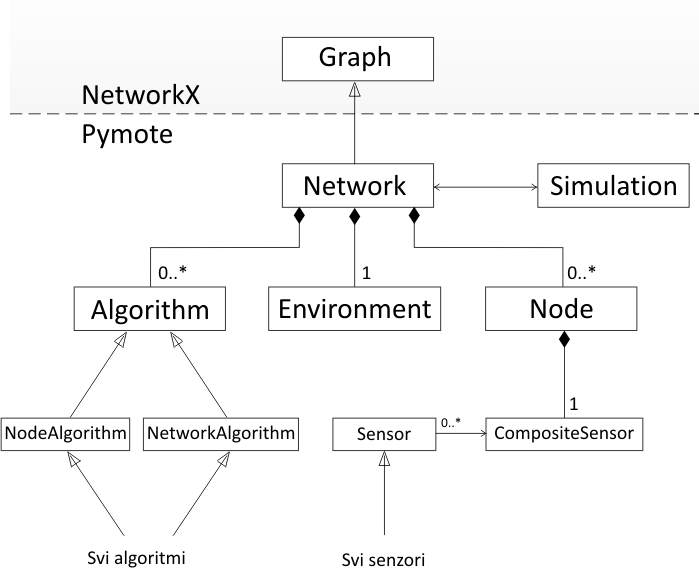

In [72]:
from IPython.display import Image
Image(filename='images/pymote_class_diagram.png')

### Graf

Pymote paket se zasniva djelomično na proširenju mogućnosti paketa [NetworkX](http://networkx.lanl.gov/index.html). Dodirna točka je klasa [Graph](http://networkx.github.io/documentation/latest/reference/classes.html) koja predstavlja neusmjereni graf.

In [73]:
from networkx import Graph
g = Graph()

`Graph` definira:

* vrhove grafa `Graph.node` -`dict` u kojem su ključevi vrhovi odnosno bilo kakvi *immutable/hashable* python objekti, a vrijednosti njihovi (opcionalni) atributi

In [74]:
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.node

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}}

* bridove grafa `Graph.adj` ili `Graph.edge` (isti objekt) - `dict` u kojem su ključevi vrhovi, a vrijednost za pojedini vrh je `dict` čiji su ključevi vrhovi susjedi zadanog vrha, a vrijednosti su (opcionalni) atributi brida

In [75]:
g.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (1, 6), (5, 2)])
print g.edge is g.adj
g.edge

True


{1: {2: {}, 3: {}, 6: {}},
 2: {1: {}, 3: {}, 5: {}},
 3: {1: {}, 2: {}, 4: {}},
 4: {3: {}, 5: {}},
 5: {2: {}, 4: {}, 6: {}},
 6: {1: {}, 5: {}}}

* razne metode za manipulaciju strukturom grafa

In [76]:
g.add_star(g.nodes())  # povezuje prvi cvor sa svim ostalima
g.edge

{1: {2: {}, 3: {}, 4: {}, 5: {}, 6: {}},
 2: {1: {}, 3: {}, 5: {}},
 3: {1: {}, 2: {}, 4: {}},
 4: {1: {}, 3: {}, 5: {}},
 5: {1: {}, 2: {}, 4: {}, 6: {}},
 6: {1: {}, 5: {}}}

* [funkcije za iscrtavanje](http://networkx.github.io/documentation/latest/reference/drawing.html)

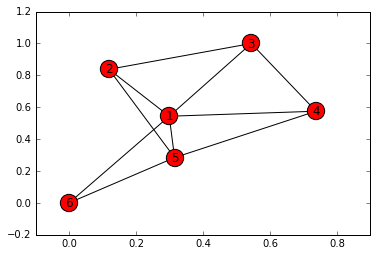

In [77]:
from networkx import draw_networkx
draw_networkx(g)

* [algoritme](http://networkx.github.io/documentation/latest/reference/algorithms.html), kao npr. [shortest_path](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html)

In [78]:
from networkx.algorithms import shortest_path
shortest_path(g, 2, 6)

[2, 1, 6]

Dodatno NetworkX paket sadrži i:

* druge tipove grafova (usmjereni, multigraf...) 

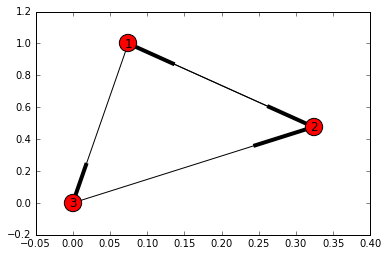

In [79]:
from networkx import DiGraph
dg = DiGraph([(1,2),(2,1),(1,3),(3,2)])
draw_networkx(dg)

* [generatore grafova](http://networkx.github.io/documentation/latest/reference/generators.html), kao npr. [hypercube_graph](http://networkx.github.io/documentation/latest/reference/generated/networkx.generators.classic.hypercube_graph.html#networkx.generators.classic.hypercube_graph)

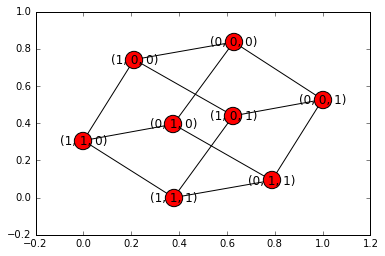

In [80]:
from networkx.generators.classic import hypercube_graph
hcg = hypercube_graph(3)
draw_networkx(hcg)

 * [konvertere](http://networkx.github.io/documentation/latest/reference/convert.html) itd.

[[ True False False  True  True False]
 [False  True  True False False  True]
 [False  True  True False False  True]
 [ True False False  True  True False]
 [False False False  True  True False]
 [ True False False False False False]]


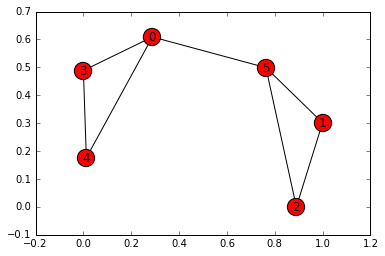

In [81]:
import numpy
mat = numpy.random.random((6, 6)) > 0.5
print mat
from networkx.convert_matrix import from_numpy_matrix
g = from_numpy_matrix(mat)
draw_networkx(g)

### Mreža

`Network` je osnovna klasa Pymote simulatora. Njene instance sadrže sve informacije potrebne kako bi se za pojedinu mrežu pokrenula ili nastavila simulacija njoj pripadajućih algoritama. Kao što je već naglašeno klasa `Network` je podklasa (podrazred) klase Graph iz paketa NetworkX. 

Uz sve postojeće značajke networkx grafa, Pymote u klasi `Network` proširuje mogućnosti sa slijedećim atributima i funkcionalnostima:

* `Network.environment` - trenutno je omogućeno samo 2D okruženje, kroz instancu klase `Environment2D`

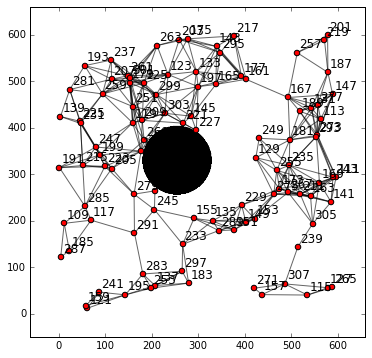

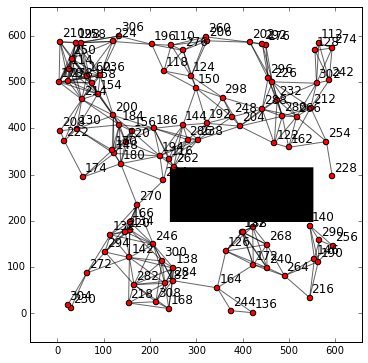

In [82]:
from pymote.environment import Environment2D
o_env = Environment2D(path='images/o_shape.png')
c_env = Environment2D(path='images/c_shape.png')
o_net = Network(environment=o_env)
c_net = Network(environment=c_env)
for _ in range(100):
    o_net.add_node()
    c_net.add_node()
o_net.show()
c_net.show()

* `Network.pos` - lokacija čvorova u okruženju

* `Network.ori` - orijentacija čvorova u okruženju

* `Network.algorithms` - torka algoritama: svi čvorovi izvršavaju iste algoritme, pa je mreža adekvatno mjesto za definiciju

In [83]:
net.algorithms

(<pymote.algorithms.broadcast.Flood at 0x3feea470>,)

* `Network.channelType` - model komunikacijskog kanala

In [84]:
net.channelType

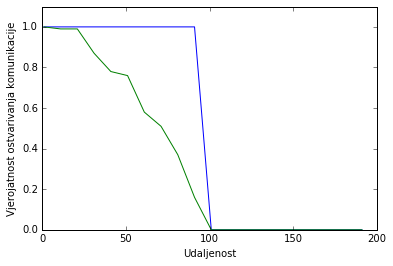

In [85]:
from pymote.channeltype import Udg, SquareDisc
from numpy import mean
import matplotlib.pyplot as plt

udg = Udg(net.environment)
scd = SquareDisc(net.environment)
udg_cr = []
scd_cr = []
distances = range(1, 201, 10)
net = Network()
node1 = net.add_node(pos=(0, 0))
for distance in distances:
    node2 = net.add_node(pos=[0, distance])
    udg_cr.append(mean(map(lambda x: udg.in_comm_range(net, node1, node2), range(100))))
    scd_cr.append(mean(map(lambda x: scd.in_comm_range(net, node1, node2), range(100))))
plt.ylim(0, 1.1)
plt.xlabel("Udaljenost")
plt.ylabel("Vjerojatnost ostvarivanja komunikacije")
plt.plot(distances, udg_cr)
plt.plot(distances, scd_cr)


* model komunikacije kroz `Network.outbox` i `Network.communicate()`

Mreža je središnji objekt u Pymote paketu i ona sadrži sve potrebne informacije kako bi se rekreirao eksperiment ili sačuvali podaci za kasniju analizu. Shodno tome implementirane su metode za njeno spremanje i čitanje s diska:

In [86]:
write_pickle(net, 'mreza1.tar.gz')
net_from_file = read_pickle('mreza1.tar.gz') 
net_from_file

In [87]:
# ukoliko je potrebno može se koristiti i
# %debug

### Algoritmi

Pymote podržava dva tipa algoritama raspodijeljeni i centralizirani:

* *Centralizirani* algoritmi se implementiraju kao podklase od `NetworkAlgorithm` i funkcioniraju po prinicipu izravnog upisivanja podataka u memoriju čvorova.
* *Raspodijeljeni* algoritmi se implementiraju kao podklase od `NodeAlgorithm`. Raspodijeljeni algoritmi mogu koristiti samo informacije spremljene u samoj memoriji čvora te one dobivene očitanjem osjetila koje pojeduje čvor.

### Čvorovi

Čvorovi su instance klase `Node` koja između ostalog implementira slijedeće atribute i metode:

* `memory` - `dict` u kojem čvor čuva cjelokupno znanje koje može prikupiti na dva načina:
 * očitanje osjetila - npr. polje `Neighbors` u algoritmu `Flood`
 * informacije u primljenim porukama - npr. polje `I` u algoritmu `Flood`

In [88]:
# some_node je cvor iz mreze u kojoj je izvrsen algoritam Flood
some_node.memory['Neighbors']

[<Node id=39>,
 <Node id=82>,
 <Node id=73>,
 <Node id=51>,
 <Node id=11>,
 <Node id=89>,
 <Node id=42>,
 <Node id=79>]

In [89]:
some_node.memory['I']

'Hello again'

* `status` - registar u memoriji s posebnim značenjem za raspodijeljene algoritme implementiran je kao poseban atribut

In [90]:
some_node.status

'DONE'

* `commRange` - komunikacijski domet čvora: u kombinaciji s pozicijom, okruženjem i modelom kominikacijskog kanala određuje susjede pojedinog čvora

In [91]:
some_node.commRange

100

* `outbox` i `_inbox` - liste u kojima su spremeljene poruke (instance klase `Message`) spremene za slanje odnosno primljene poruke
* `send()` - metoda za slanje poruka drugim čvorovima
* `compositeSensor` - predstavlja torku osjetila koji su instalirani na čvoru te implementira metodu `read()` koja vraća `dict` s ključevima koji odgovaraju pojedinom osjetilu, a vrijednosti su njihova trenutna očitanja

In [92]:
print some_node.compositeSensor
print some_node.compositeSensor.sensors
some_node.compositeSensor.read()

(<pymote.sensor.NeighborsSensor object at 0x000000003FBD76D8>,)


{'Neighbors': [<Node id=39>,
  <Node id=82>,
  <Node id=73>,
  <Node id=51>,
  <Node id=11>,
  <Node id=89>,
  <Node id=42>,
  <Node id=79>]}

### Osjetila

Osjetila predstavljaju sučelje čvora prema okolini. Impelentirani su kao podklase apstraktne klase `Sensor`. Implementiraju metodu `read()` koja u ovisnosti o osjetilu može svoje podatke dobiti uvidom u mrežu odnosno okruženje.

In [93]:
from pymote.sensor import TruePosSensor
new_net = Network()

node = new_net.add_node(pos=[100, 100])
node.compositeSensor = (TruePosSensor, 'DistSensor')

new_net.add_node(pos=[170, 170])
node.compositeSensor.read()

{'Dist': {<Node id=331>: 116.78415014912323}, 'TruePos': array([100, 100])}

Zgodno je primjetiti kako je prvo osjetilo pridruženo kao klasa, a drugo samo imenom klase. I jedna i druga opcija su moguće.

Pojedino osjetilo može implementirati atribut `probabilityFunction` koji mu omogućava 'zašumljivanje' dobivenih podataka kako bi očitanje bilo bliže realnom očitanju koje je u većini slučajeva podložno manjim ili većim mjernim nesigurnostima.

In [94]:
dist_sensor = node.compositeSensor.sensors[0]
dist_sensor.probabilityFunction.pf

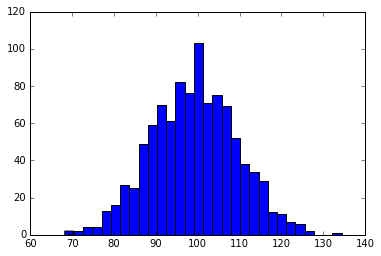

In [95]:
distances = []
for i in range(1000):
    distances.append(node.compositeSensor.read()['Dist'].values()[0])
h = plt.hist(distances,bins=30)

Osjetila koje određeni čvor posjeduje mogu promijeniti njegovu ulogu unutar pojeding algoritma. Primjerice kod algoritma lokalizacije čvor s `TruePos` osjetilom predstavlja sidro.

Osjetila služe i kako bi se implementirala određene pretpostavke, nazvane još i ograničenja algoritma. Primjerice, ukoliko algoritam zahtijeva za svaki čvor poznavanje svojih susjeda tada se u svakom čvoru postavlja osjetilo `NeighborsSensor` čijim očitanjem čvor u svakom trenutku može 'očitati' svoje susjede.

### Simulacija

Klasa `Simulation` se brine za izvršavanje algoritma u pripadajućoj mreži `Simulation.network`.

Između ostalog, brine se i za osvježavanje grafičkog sučelja simulatora. 

<!--- Definirana je kao dretva (*thread*) odnosno podklasa od klase `QtCore.QThread` paketa Pyside.
-->

### Postavke

Kako bi rad u interaktivnoj konzoli, grafičkom sučelji ili u automatiziranim eksperimentima bio olakšan potrebno je preddefinirati određene vrijednosti. Takve vrijednosti definiraju se u postavkama `pymote.conf.settings`.

Trenutne globalne postavke:

In [ ]:
"""Default pymote settings.

Override these with settings in the module pointed-to by the 
PYMOTE_SETTINGS_MODULE environment variable or by using 
settings.configure(**settings) or settings.load('path.to.settings')

"""

import scipy.stats 
from numpy import pi

###########
# NETWORK #
###########
ENVIRONMENT = 'Environment2D'
ENVIRONMENT2D_SHAPE = (600,600)


ALGORITHMS = ()
#ALGORITHMS = ((ReadSensors,
#               {'sensorReadingsKey':'sensorReadings'}),
#              )

CHANNEL_TYPE = 'Udg'




##########
#  NODE  #
##########
SENSORS = ('NeighborsSensor', )
#SENSORS = ('AoASensor','DistSensor')
ACTUATORS = ()
COMM_RANGE = 100

AOA_PF_PARAMS = {'pf': scipy.stats.norm,
                 'scale':10*pi/180} # in radians
DIST_PF_PARAMS = {'pf': scipy.stats.norm,
                 'scale':10}


Postavke se mogu promijeniti odnosno prepisati (*override*-ati) na nekoliko načina:

* pisanjem novog modula settings.py na kojeg se referencira *environment* varijabla `PYMOTE_SETTINGS_MODULE` u npr. `paket.podpaket.settings`
* prije prvog korištenja postavki one se mogu promijeniti korištenjem `settings.configure(**settings)` ili
* korištenjem `settings.load('paket.podpaket.settings')` u bilo kojem trenutku

## GUI

Grafičko sučelje simulatora pokreće se:

1. u *standalone* verziji korištenjem instaliranog programa `pymote-simgui`
2. iz interaktivne konzole sa `%run pymote/gui/simulationgui.py`

Prednost druge metode je u tome što se paralelno sa sučeljem u konzoli može pristupiti svim objektima koristeći objekt `simgui` npr. `simgui.net` predstavlja mrežu koja je trenutno u sučelju.